In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import skimage.io as io

import matplotlib
%matplotlib inline

import utils, morph, my_types

In [3]:
from pathlib import Path
data = Path("input")
data.mkdir(parents=True, exist_ok=True)

In [4]:
# matplotlib.use("TkAgg")
# matplotlib.use("Tk")
# matplotlib.interactive(True)

# Alignment

In [5]:
%matplotlib tk
if not Path("input/me_align.pkl").exists():
    me_align_pts = utils.pick_points("input/me_original.jpg", 2, APPEND_CORNERS=False)
    utils.save_points(me_align_pts, "input/me_align.pkl")
me_align_pts = utils.load_points("input/me_align.pkl")

if not Path("input/iu_align.pkl").exists():
    iu_align_pts = utils.pick_points("input/iu_original.jpg", 2, APPEND_CORNERS=False)
    utils.save_points(iu_align_pts, "input/iu_align.pkl")
iu_align_pts = utils.load_points("input/iu_align.pkl")

In [6]:
%matplotlib inline

In [7]:
iu_align_pts

array([[323.27199216, 531.44349544],
       [572.88686297, 533.47288463]])

In [8]:
iu_align_pts

array([[323.27199216, 531.44349544],
       [572.88686297, 533.47288463]])

(575, 547, 3)

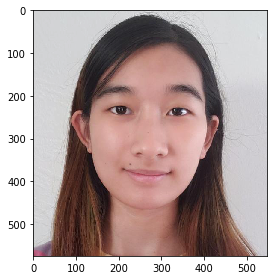

In [9]:
me = utils.to_img_arr("input/me.jpg")
io.imshow(me)
me.shape

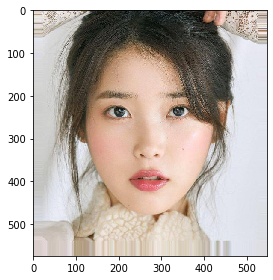

In [10]:
iu = utils.to_img_arr("input/iu.jpg")
io.imshow(iu)

# Define Correspondences

In [11]:
NUM_POINTS = 59

In [12]:
%matplotlib tk
if not Path("input/me.pkl").exists():
    me_pts = utils.pick_points("input/me.jpg", NUM_POINTS)
    utils.save_points(me_pts, "input/me.pkl")
me_pts = utils.load_points("input/me.pkl")
assert len(me_pts) == NUM_POINTS + 4, len(me_pts)

In [13]:
%matplotlib tk
if not Path("input/iu.pkl").exists():
    iu_pts = utils.pick_points("input/iu.jpg", NUM_POINTS)
    utils.save_points(iu_pts, "input/iu.pkl")
iu_pts = utils.load_points("input/iu.pkl")
assert len(iu_pts) == NUM_POINTS + 4, len(iu_pts)

# Compute Morphing

## Me and IU

In [14]:
%matplotlib inline

(575, 547, 3)

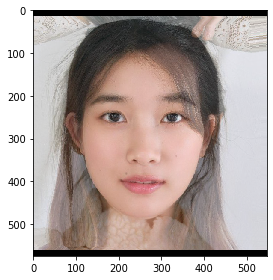

In [15]:
import morph
middle_img, mid_pts, triangulation = morph.compute_middle_object(me, iu, me_pts, iu_pts, alpha=0.5)
io.imshow(middle_img)
middle_img.shape

(575, 547, 3)

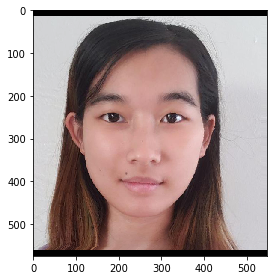

In [16]:
me_warped = morph.warp_img(me, me_pts, mid_pts, triangulation)
io.imshow(me_warped)
me_warped.shape

In [17]:
iu_warped = morph.warp_img(iu, iu_pts, mid_pts, triangulation)

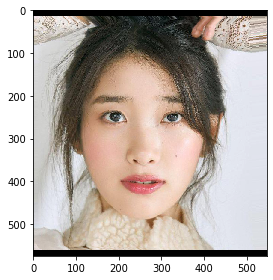

In [18]:
io.imshow(iu_warped)

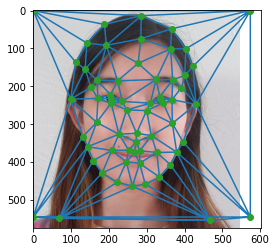

In [19]:
morph.plot_tri_mesh(me, me_pts, triangulation)

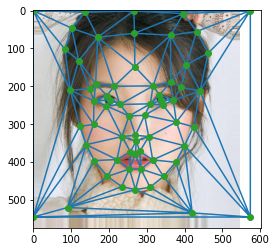

In [20]:
morph.plot_tri_mesh(iu, iu_pts, triangulation)

In [21]:
"""Uncomment this for video"""
# video_path = Path("output/me_iu.mp4")
# video_frames = morph.compute_morph_video(me, iu, me_pts, iu_pts, video_path, num_frames=20, fps=10)

'Uncomment this for video'

## Bells and Whistles

In [22]:
import utils, morph

In [23]:
%matplotlib tk
if not Path("input/im_ugly.pkl").exists():
    other_pts = utils.pick_points("input/im_ugly.jpg", NUM_POINTS)
    utils.save_points(other_pts, "input/im_ugly.pkl")
other_pts = utils.load_points("input/im_ugly.pkl")
assert len(other_pts) == NUM_POINTS + 4, len(other_pts)

In [24]:
%matplotlib inline

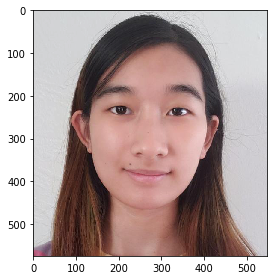

In [25]:
io.imshow(me)

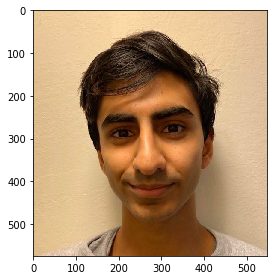

In [26]:
other = utils.to_img_arr("input/im_ugly.jpg")
io.imshow(other)

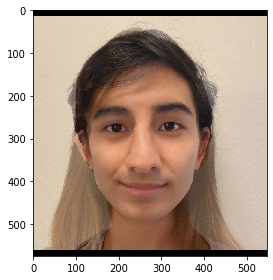

In [27]:
%matplotlib inline
middle_img, mid_pts, triangulation = morph.compute_middle_object(me, other, me_pts, other_pts, alpha=0.5)
me_warped = morph.warp_img(me, me_pts, mid_pts, triangulation)
other_warped = morph.warp_img(other, other_pts, mid_pts, triangulation)
io.imshow(middle_img)

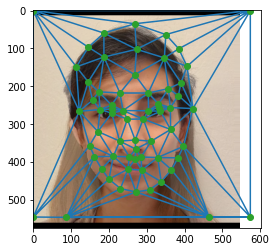

In [28]:
morph.plot_tri_mesh(middle_img, mid_pts, triangulation)

In [29]:
"""Uncomment this for video"""
# video_path = Path("output/bells.mp4")
# video_frames = morph.compute_morph_video(
#     me, other, me_pts, other_pts, video_path, num_frames=80, fps=25, boomerang=False
# )

'Uncomment this for video'

# Population Mean

In [67]:
import population_mean as pop
%matplotlib inline

## Me, IU and Other

In [68]:
pop_imgs = [iu, me, other]
pop_pts = [iu_pts, me_pts, other_pts]
mean_pts = np.mean(pop_pts, axis=0)
assert len(mean_pts) == 63

In [69]:
pop_img, pop_pts, triangulation, warped_imgs = pop.compute_population_mean(pop_imgs, pop_pts)

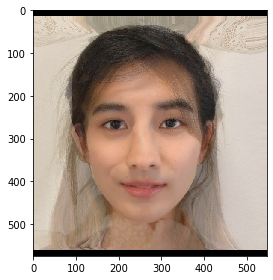

In [70]:
io.imshow(pop_img)

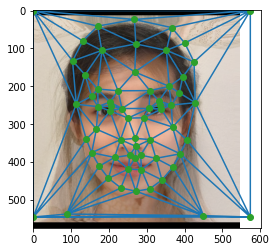

In [75]:
morph.plot_tri_mesh(pop_img, pop_pts, triangulation)

### Caricature

Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


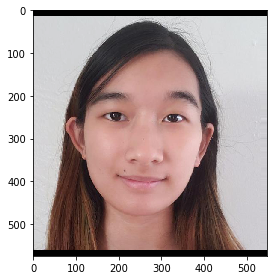

In [80]:
cari_me8 = pop.caricature(me, me_pts, pop_pts, triangulation, alpha=0.8)
io.imshow(cari_me8)
io.imsave("output/cari_me8.jpg", cari_me8)

Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


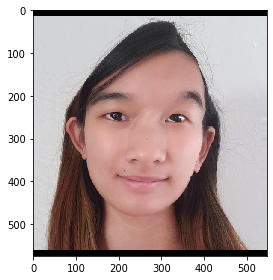

In [79]:
cari_me3 = pop.caricature(me, me_pts, pop_pts, triangulation, alpha=3)
io.imshow(cari_me3)
io.imsave("output/cari_me3.jpg", cari_me3)

## Danes

### Import

In [35]:
import population_mean as pop

In [36]:
from my_types import to_img_arr
import matplotlib.pyplot as plt
import utils
man = to_img_arr("imm_face_db/01-1m.jpg")
man_pts = utils.load_points_from_asf("imm_face_db/01-1m.asf", APPEND_CORNERS=True)
man.shape

(480, 640, 3)

In [37]:
# pop_dir = Path("imm_face_db")
pop_dir = Path("danes")

all_imgs = sorted(list(Path(pop_dir).glob("*-1*.jpg")))
all_pts = sorted(list(Path(pop_dir).glob("*-1*.asf")))

male_imgs = sorted(list(Path(pop_dir).glob("*-1m.jpg")))
male_pts = sorted(list(Path(pop_dir).glob("*-1m.asf")))

female_imgs = list(Path(pop_dir).glob("*-1f.jpg"))
female_pts = list(Path(pop_dir).glob("*-1f.asf"))

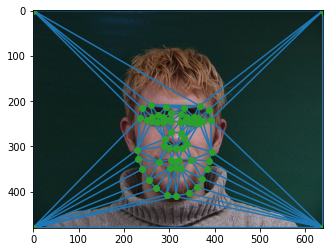

In [38]:
man = my_types.to_img_arr("imm_face_db/01-1m.jpg")
man_pts = my_types.to_points("imm_face_db/01-1m.asf")
# man_pts.shape
# # assert man_pts.shape[1] == 2
# # print(man_pts)
# # print(pop.fix_pop_pts(man_pts))
man_pts = pop.fix_pop_pts(man_pts)
# # utils.plot_points(man, pop.fix_pop_pts(man_pts))
morph.plot_tri_mesh(man, man_pts, morph.delaunay(man_pts))

### Compute "mean danes"

Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


Exception in Tkinter callback
Traceback (most recent call last):
  File "/usr/local/Cellar/python@3.8/3.8.6/Frameworks/Python.framework/Versions/3.8/lib/python3.8/tkinter/__init__.py", line 1883, in __call__
    return self.func(*args)
  File "/usr/local/Cellar/python@3.8/3.8.6/Frameworks/Python.framework/Versions/3.8/lib/python3.8/tkinter/__init__.py", line 804, in callit
    func(*args)
  File "/Users/aprilsin/Library/Python/3.8/lib/python/site-packages/matplotlib/backends/_backend_tk.py", line 253, in idle_draw
    self.draw()
  File "/Users/aprilsin/Library/Python/3.8/lib/python/site-packages/matplotlib/backends/backend_tkagg.py", line 9, in draw
    super(FigureCanvasTkAgg, self).draw()
  File "/Users/aprilsin/Library/Python/3.8/lib/python/site-packages/matplotlib/backends/backend_agg.py", line 407, in draw
    self.figure.draw(self.renderer)
  File "/Users/aprilsin/Library/Python/3.8/lib/python/site-packages/matplotlib/backend_bases.py", line 1544, in _draw
    def _draw(renderer

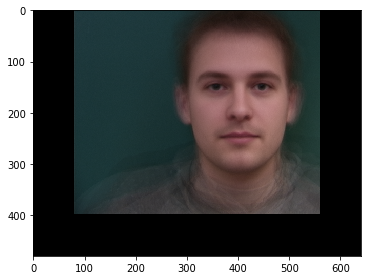

In [54]:
mean_danes, mean_pts, triangulation, warped_imgs = pop.compute_population_mean(all_imgs, all_pts, NEED_FIX=True)
io.imsave("output/mean_danes.jpg", mean_danes)
io.imshow(mean_danes)

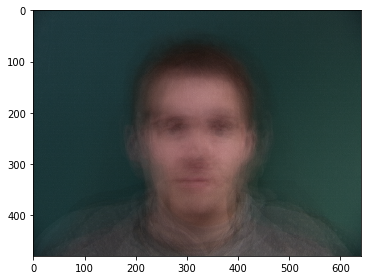

In [40]:
direct_avg = pop.direct_avg(all_imgs)
io.imshow(direct_avg)

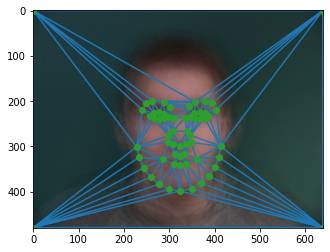

In [41]:
morph.plot_tri_mesh(direct_avg, mean_pts, triangulation)

### Example warped faces

In [42]:
len(warped_imgs)

22

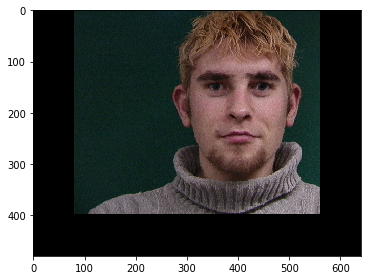

In [43]:
io.imshow(warped_imgs[0])

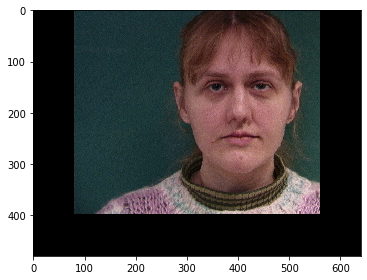

In [44]:
io.imshow(warped_imgs[5])

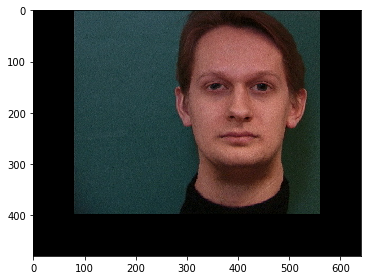

In [45]:
io.imshow(warped_imgs[20])

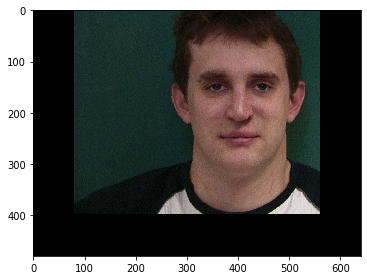

In [46]:
io.imshow(warped_imgs[8])

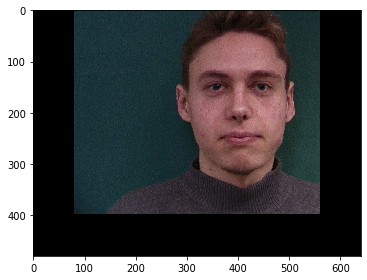

In [47]:
io.imshow(warped_imgs[10])

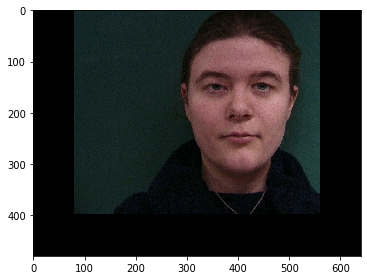

In [48]:
io.imshow(warped_imgs[11])

### Caricature

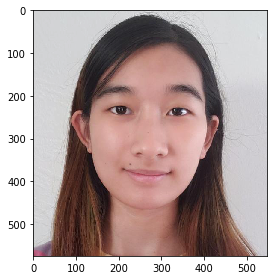

In [81]:
io.imshow(me)

In [82]:
%matplotlib tk
NUM_POINTS = 58
if not Path("input/me_danes1.pkl").exists():
    me_danes_pts = utils.pick_points("input/me.jpg", NUM_POINTS)
    utils.save_points(me_pts, "input/me_danes1.pkl")
me_danes_pts = utils.load_points("input/me_danes1.pkl")
assert len(me_pts) == NUM_POINTS + 4, len(me_pts)

AssertionError: 63

In [58]:
%matplotlib inline

In [83]:
cari_me = pop.caricature(me, me_danes_pts, mean_pts, triangulation, alpha=0.5)
io.imshow(cari_me)

ValueError: operands could not be broadcast together with shapes (62,2) (63,2) 